In [1]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
import speclite.filters
from astropy.io import ascii
import stsynphot as stsyn
from astropy.table import Table
from astropy.time import Time
from synphot import Observation

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs, effarea
import mejiro

In [8]:
detectors = ['uvis1']  # , 'uvis2'
filtnames = ['F438W', 'F475W', 'F555W', 'F606W', 'F625W', 'F775W', 'F814W', 'F850LP']
mjd = '60035'  # April 1st, 2023
# mjd = str(Time.now().mjd)  # Time right now

#Aperture Radius
aper = '6.0'  # 151 pixels (infinity) [default behavior]
#aper = '0.396'              # 10 pixels for UVIS

In [3]:
def build_obsmode(detector, filt, mjd, aper):
    return f'wfc3,{detector},{filt},mjd#{mjd},aper#{aper}'

In [4]:
def calculate_zp_abmag(bp):
    # STMag
    photflam = bp.unit_response(stsyn.conf.area)  # inverse sensitivity in flam
    stmag = -21.1 - 2.5 * np.log10(photflam.value)

    # Pivot Wavelength and bandwidth
    photplam = bp.pivot()  # pivot wavelength in angstroms
    bandwidth = bp.photbw()  # bandwidth in angstroms

    # ABMag
    return stmag - 5 * np.log10(photplam.value) + 18.6921

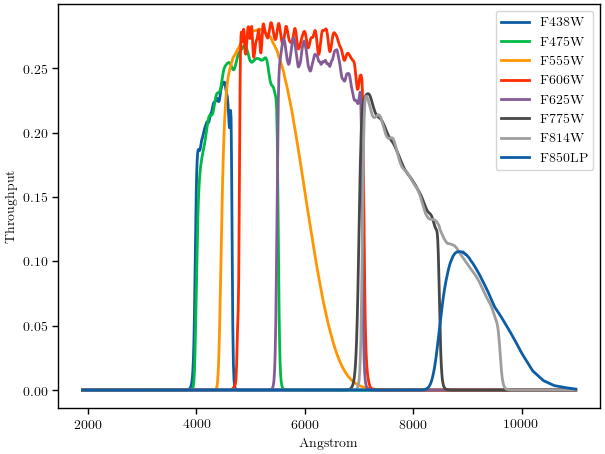

In [10]:
for detector in detectors:
    for filt in filtnames:
        obsmode = build_obsmode(detector, filt.lower(), mjd, aper)
        bp = stsyn.band(obsmode)

        zp_abmag = calculate_zp_abmag(bp)

        wavelengths = bp.binset
        throughput = bp(wavelengths)

        plt.plot(wavelengths.value, throughput.value, label=filt)

plt.xlabel(wavelengths.unit)
plt.ylabel('Throughput')
plt.legend()
plt.show()

In [ ]:
# use MJD date of 60035 (April 1st, 2023)

# ACS/WFC wide and longpass filters: F435W, F475W, F555W, F606W, F625W, F775W, F814W, F850LP